In [28]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade nltk
!pip install --upgrade matplotlib
%matplotlib inline

In [29]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [30]:
dataframe = pd.read_csv('train_bodies.csv')

In [31]:
dataframe.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [32]:
dfinal = pd.read_csv('train_stances.csv')

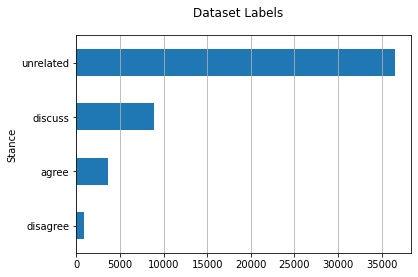

In [33]:
fig, ax = plt.subplots()
fig.suptitle("Dataset Labels", fontsize=12)
dfinal["Stance"].reset_index().groupby("Stance").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [34]:
dfinal['Headline'] = dfinal['Headline'].str.lower()
dataframe['articleBody'] = dataframe['articleBody'].str.lower()
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,(newser) – wonder how long a quarter pounder w...
3,6,"posting photos of a gun-toting child online, i..."
4,7,at least 25 suspected boko haram insurgents we...


In [35]:
dfinal.head()

,Headline,Body ID,Stance
0,police find mass graves with at least '15 bodi...,712,unrelated
1,hundreds of palestinians flee floods in gaza a...,158,agree
2,"christian bale passes on role of steve jobs, a...",137,unrelated
3,hbo and apple in talks for $15/month apple tv ...,1034,unrelated
4,spider burrowed through tourist's stomach and ...,1923,disagree


In [36]:
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,(newser) – wonder how long a quarter pounder w...
3,6,"posting photos of a gun-toting child online, i..."
4,7,at least 25 suspected boko haram insurgents we...


In [39]:
dfinal['Headline'] = dfinal['Headline'].str.replace('[^\w\s]','')
dataframe['articleBody'] = dataframe['articleBody'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [40]:
dfinal.head()

,Headline,Body ID,Stance
0,police find mass graves with at least 15 bodie...,712,unrelated
1,hundreds of palestinians flee floods in gaza a...,158,agree
2,christian bale passes on role of steve jobs ac...,137,unrelated
3,hbo and apple in talks for 15month apple tv st...,1034,unrelated
4,spider burrowed through tourists stomach and u...,1923,disagree


In [41]:
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,newser wonder how long a quarter pounder with...
3,6,posting photos of a guntoting child online isi...
4,7,at least 25 suspected boko haram insurgents we...


## Remove stopwords

In [42]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
dfinal['Headline'] = dfinal['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataframe['articleBody'] = dataframe['articleBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [44]:
dfinal.head()

,Headline,Body ID,Stance
0,police find mass graves least 15 bodies near m...,712,unrelated
1,hundreds palestinians flee floods gaza israel ...,158,agree
2,christian bale passes role steve jobs actor re...,137,unrelated
3,hbo apple talks 15month apple tv streaming ser...,1034,unrelated
4,spider burrowed tourists stomach chest,1923,disagree


In [45]:
dataframe.head()

,Body ID,articleBody
0,0,small meteorite crashed wooded area nicaraguas...
1,4,last week hinted come ebola fears spread acros...
2,5,newser wonder long quarter pounder cheese last...
3,6,posting photos guntoting child online isis sup...
4,7,least 25 suspected boko haram insurgents kille...


## Tokenizing

In [46]:
nltk.download('punkt') # χρειάζεται για το tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
dfinal['Headline'] = dfinal['Headline'].apply(nltk.word_tokenize)
dataframe['articleBody']=dataframe['articleBody'].apply(nltk.word_tokenize)

In [48]:
dfinal.head()

,Headline,Body ID,Stance
0,"[police, find, mass, graves, least, 15, bodies...",712,unrelated
1,"[hundreds, palestinians, flee, floods, gaza, i...",158,agree
2,"[christian, bale, passes, role, steve, jobs, a...",137,unrelated
3,"[hbo, apple, talks, 15month, apple, tv, stream...",1034,unrelated
4,"[spider, burrowed, tourists, stomach, chest]",1923,disagree


In [49]:
dataframe.head()

,Body ID,articleBody
0,0,"[small, meteorite, crashed, wooded, area, nica..."
1,4,"[last, week, hinted, come, ebola, fears, sprea..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[posting, photos, guntoting, child, online, is..."
4,7,"[least, 25, suspected, boko, haram, insurgents..."


In [50]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

porter_stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [51]:
dfinal['Headline'] = dfinal['Headline'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
dataframe['articleBody'] = dataframe['articleBody'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [52]:
dfinal.head()

,Headline,Body ID,Stance
0,"[polic, find, mass, grave, least, 15, bodi, ne...",712,unrelated
1,"[hundr, palestinian, flee, flood, gaza, israel...",158,agree
2,"[christian, bale, pass, role, steve, job, acto...",137,unrelated
3,"[hbo, appl, talk, 15month, appl, tv, stream, s...",1034,unrelated
4,"[spider, burrow, tourist, stomach, chest]",1923,disagree


In [53]:
dataframe.head()

,Body ID,articleBody
0,0,"[small, meteorit, crash, wood, area, nicaragua..."
1,4,"[last, week, hint, come, ebola, fear, spread, ..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[post, photo, guntot, child, onlin, isi, suppo..."
4,7,"[least, 25, suspect, boko, haram, insurg, kill..."


In [54]:
dfinal.to_csv('stem_train_stances.csv', index = False)
dataframe.to_csv('stem_train_bodies.csv', index=False)